In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())

In [4]:
import pandas as pd
data=pd.read_csv("../datasets/blood_transfusion.csv")
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [15]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [6]:
target=data["Class"]

In [10]:
features=data.drop(columns=["Class"])
features.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [23]:
features.shape

(748, 4)

In [32]:
# ShuffleSplit?

sp=ShuffleSplit(n_splits=10,test_size=0.2, random_state=42)

In [33]:
type(sp)


sklearn.model_selection._split.ShuffleSplit

In [34]:
cv_results=cross_validate(
    model,
    features,
    target,
    cv=sp, 
    scoring="accuracy", 
    return_train_score=True, 
    n_jobs=2)

In [35]:
cv_results

{'fit_time': array([0.01054192, 0.01152873, 0.01502943, 0.01217198, 0.01286054,
        0.01207852, 0.0153904 , 0.01351905, 0.01518416, 0.01149678]),
 'score_time': array([0.00546527, 0.00792956, 0.00807452, 0.00455189, 0.0055058 ,
        0.00450253, 0.00427985, 0.00550985, 0.00400782, 0.00515771]),
 'test_score': array([0.75333333, 0.83333333, 0.8       , 0.72      , 0.72      ,
        0.78      , 0.78      , 0.75333333, 0.82      , 0.80666667]),
 'train_score': array([0.79264214, 0.77424749, 0.76755853, 0.79431438, 0.79264214,
        0.78929766, 0.78595318, 0.78428094, 0.78929766, 0.79431438])}

In [37]:
from sklearn.model_selection import validation_curve

In [39]:
import numpy as np

In [40]:
gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"

In [41]:
train_scores,test_scores=validation_curve(
    model,
    features,
    target,
    param_name=param_name,
    param_range=gammas,
    cv=sp,
    scoring="accuracy",
    n_jobs=2
)

In [42]:
train_scores

array([[0.76421405, 0.74749164, 0.7541806 , 0.77926421, 0.77424749,
        0.75083612, 0.75585284, 0.76923077, 0.74749164, 0.75752508],
       [0.76421405, 0.74749164, 0.7541806 , 0.77926421, 0.77424749,
        0.75083612, 0.75585284, 0.76923077, 0.74749164, 0.75752508],
       [0.76421405, 0.74749164, 0.7541806 , 0.77926421, 0.77424749,
        0.75083612, 0.75585284, 0.76923077, 0.74749164, 0.75752508],
       [0.76421405, 0.74749164, 0.7541806 , 0.77926421, 0.77424749,
        0.75083612, 0.75585284, 0.76923077, 0.74749164, 0.75752508],
       [0.76421405, 0.74749164, 0.7541806 , 0.77926421, 0.77424749,
        0.75250836, 0.75585284, 0.76923077, 0.74916388, 0.75752508],
       [0.76588629, 0.75083612, 0.75919732, 0.77926421, 0.77591973,
        0.75752508, 0.75752508, 0.77257525, 0.75250836, 0.75752508],
       [0.76923077, 0.7541806 , 0.76086957, 0.77926421, 0.77759197,
        0.75919732, 0.76254181, 0.77591973, 0.7541806 , 0.76086957],
       [0.77090301, 0.75585284, 0.7625418

In [43]:
import matplotlib.pyplot as plt

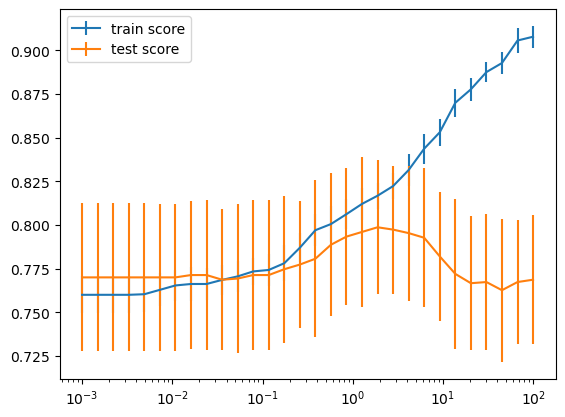

In [47]:
plt.errorbar(gammas,train_scores.mean(axis=1),yerr=train_scores.std(axis=1), label="train score")
plt.errorbar(gammas,test_scores.mean(axis=1),yerr=test_scores.std(axis=1), label="test score")
# plt.errorbar(max_depth,test_errors.mean(axis=1), yerr=test_errors.std(axis=1),label = "Test error")
plt.xscale("log")
plt.legend()

In [48]:
from sklearn.model_selection import learning_curve

In [49]:
train_sizes = np.linspace(0.1, 1, num=10)


In [50]:
results=learning_curve(
    model,
    features,
    target,
    train_sizes=train_sizes,
    cv=sp,
    scoring="accuracy",
    n_jobs=2
)

In [51]:
results

(array([ 59, 119, 179, 239, 299, 358, 418, 478, 538, 598]),
 array([[0.74576271, 0.79661017, 0.79661017, 0.89830508, 0.77966102,
         0.77966102, 0.76271186, 0.77966102, 0.76271186, 0.79661017],
        [0.74789916, 0.80672269, 0.77310924, 0.88235294, 0.79831933,
         0.74789916, 0.79831933, 0.79831933, 0.78151261, 0.79831933],
        [0.74860335, 0.7877095 , 0.74301676, 0.82681564, 0.81005587,
         0.76536313, 0.7877095 , 0.81564246, 0.80446927, 0.80446927],
        [0.75732218, 0.78661088, 0.76569038, 0.84518828, 0.78242678,
         0.78242678, 0.78242678, 0.78661088, 0.76987448, 0.77824268],
        [0.75250836, 0.80267559, 0.77926421, 0.81939799, 0.79264214,
         0.77591973, 0.79264214, 0.77257525, 0.76923077, 0.79264214],
        [0.75977654, 0.80167598, 0.78212291, 0.81005587, 0.79329609,
         0.76536313, 0.79050279, 0.7849162 , 0.7877095 , 0.79050279],
        [0.77751196, 0.79904306, 0.77272727, 0.81100478, 0.79665072,
         0.77272727, 0.78947368, 0.76

In [52]:
train_size,train_scores,test_scores=results[:3]

Text(0, 0.5, 'Mean scores (accuracy)')

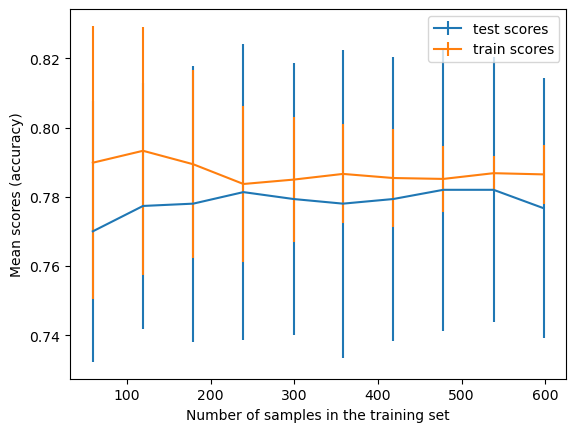

In [55]:
plt.errorbar(train_size,test_scores.mean(axis=1),yerr=test_scores.std(axis=1), label="test scores")
plt.errorbar(train_size,train_scores.mean(axis=1),yerr=train_scores.std(axis=1), label="train scores")

plt.legend()
#plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean scores (accuracy)")